<a href="https://colab.research.google.com/github/neel26desai/data_cleaning_and_eda/blob/main/EDASpatioTemproal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Overview
Performing EDA, data cleaning, data preparation and modelling on syhnthetic Spatio temporal data, generted by ChatGPT.

Scenario: We'll generate data for a fictitious city where we're monitoring air quality (specifically, PM2.5 concentration levels) at various monitoring stations over time.

Data Structure:

Spatial Dimension: Each record will have a latitude and longitude representing the location of a monitoring station in our fictitious city.
Temporal Dimension: Each record will also have a timestamp indicating when the PM2.5 concentration was measured.
Attribute: PM2.5 concentration value.
Assumptions:

We have 10 monitoring stations spread across the city.
We'll generate data for one month, with hourly readings.
PM2.5 concentrations will vary between 0 (very clean air) and 500 (very polluted air), with some randomness and temporal trends (e.g., higher pollution during certain hours).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [ ]:
df = pd.read_pickle('/content/drive/MyDrive/synthetic_spatiotemporal_data.pkl')

## EDA

In [ ]:
# Basic Statistics

# Shape of the dataset
shape = df.shape

# Descriptive statistics
desc_stats = df['PM2.5'].describe()

# Checking for missing values
missing_values = df.isnull().sum()

shape, desc_stats, missing_values


((7440, 4),
 count    7440.000000
 mean      249.799639
 std        81.125116
 min        31.621156
 25%       184.097177
 50%       250.447654
 75%       314.556605
 max       476.082269
 Name: PM2.5, dtype: float64,
 Latitude     0
 Longitude    0
 Timestamp    0
 PM2.5        0
 dtype: int64)

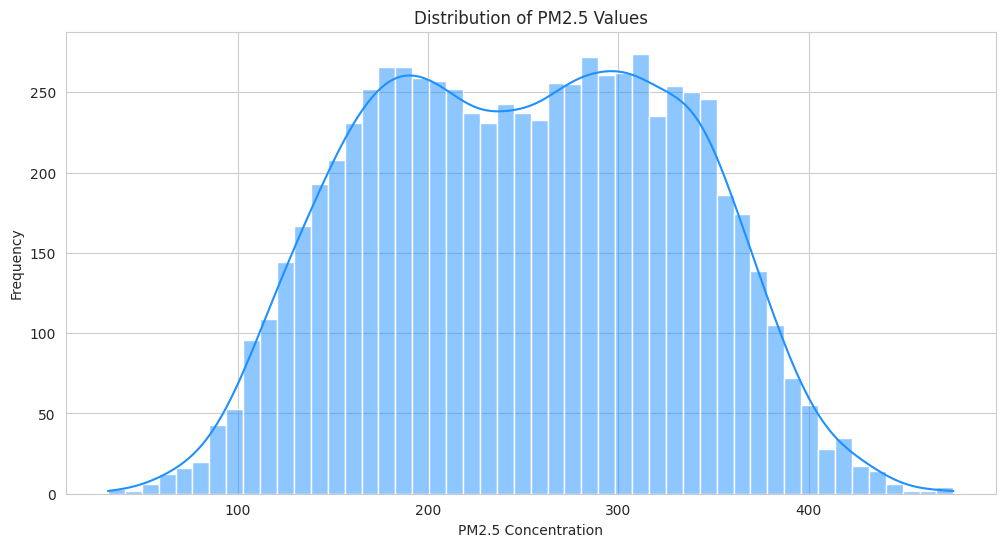

In [ ]:
import seaborn as sns

# Setting up the style
sns.set_style("whitegrid")

# Distribution of PM2.5 values
plt.figure(figsize=(12, 6))
sns.histplot(df['PM2.5'], bins=50, kde=True, color='dodgerblue')
plt.title('Distribution of PM2.5 Values')
plt.xlabel('PM2.5 Concentration')
plt.ylabel('Frequency')
plt.show()

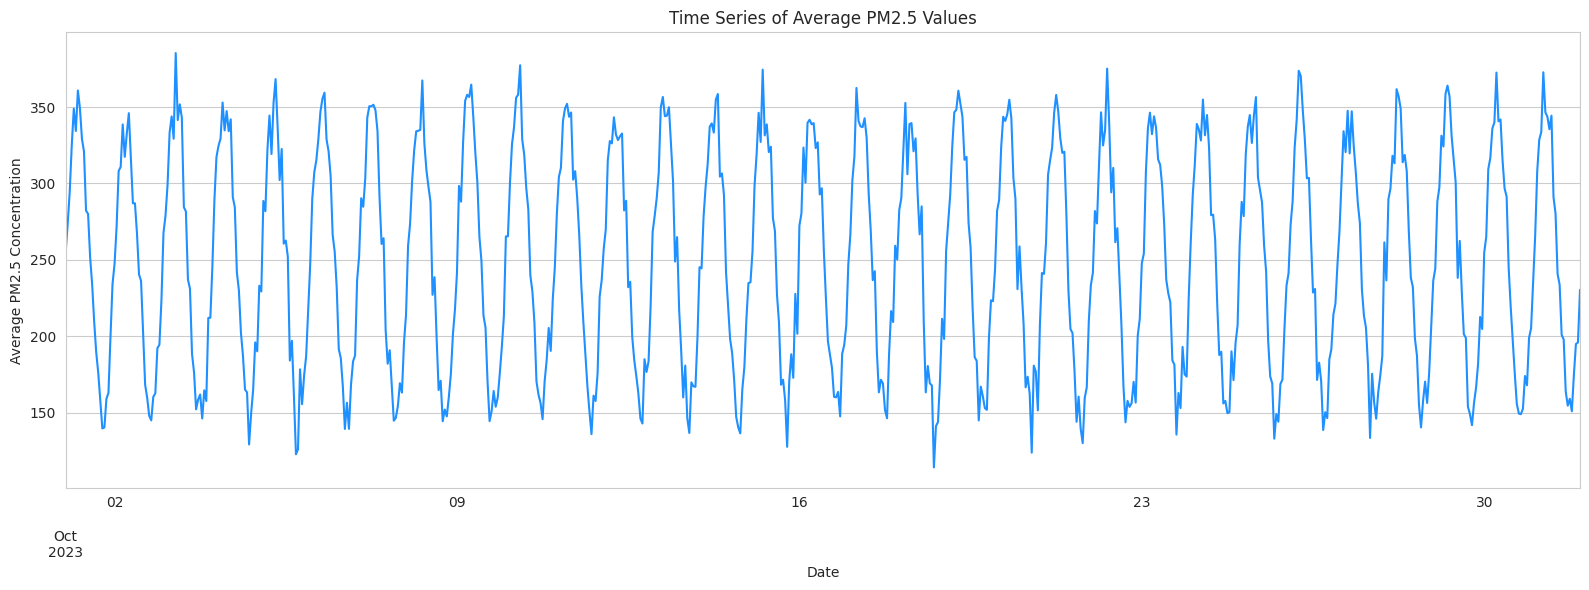

In [ ]:
# Time series plot of average PM2.5 values

# Group by Timestamp to get average PM2.5 values
time_series_data = df.groupby('Timestamp')['PM2.5'].mean()

plt.figure(figsize=(16, 6))
time_series_data.plot(color='dodgerblue')
plt.title('Time Series of Average PM2.5 Values')
plt.xlabel('Date')
plt.ylabel('Average PM2.5 Concentration')
plt.tight_layout()
plt.show()


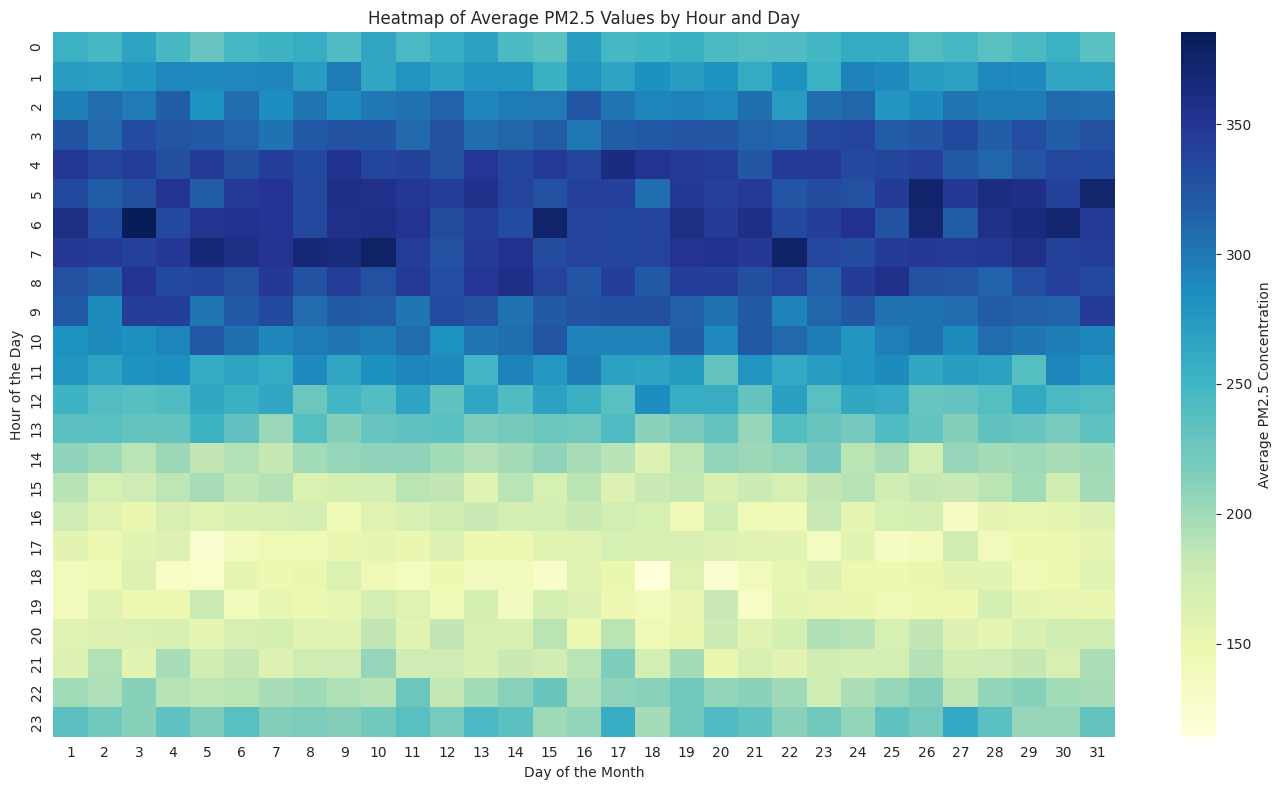

In [ ]:
# Heatmap of PM2.5 values for different hours and days

# Extracting hour and day from the Timestamp
df['Hour'] = df['Timestamp'].dt.hour
df['Day'] = df['Timestamp'].dt.day

# Creating a pivot table for the heatmap
heatmap_data = df.pivot_table(values='PM2.5', index='Hour', columns='Day', aggfunc='mean')

plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', cbar_kws={'label': 'Average PM2.5 Concentration'})
plt.title('Heatmap of Average PM2.5 Values by Hour and Day')
plt.xlabel('Day of the Month')
plt.ylabel('Hour of the Day')
plt.tight_layout()
plt.show()


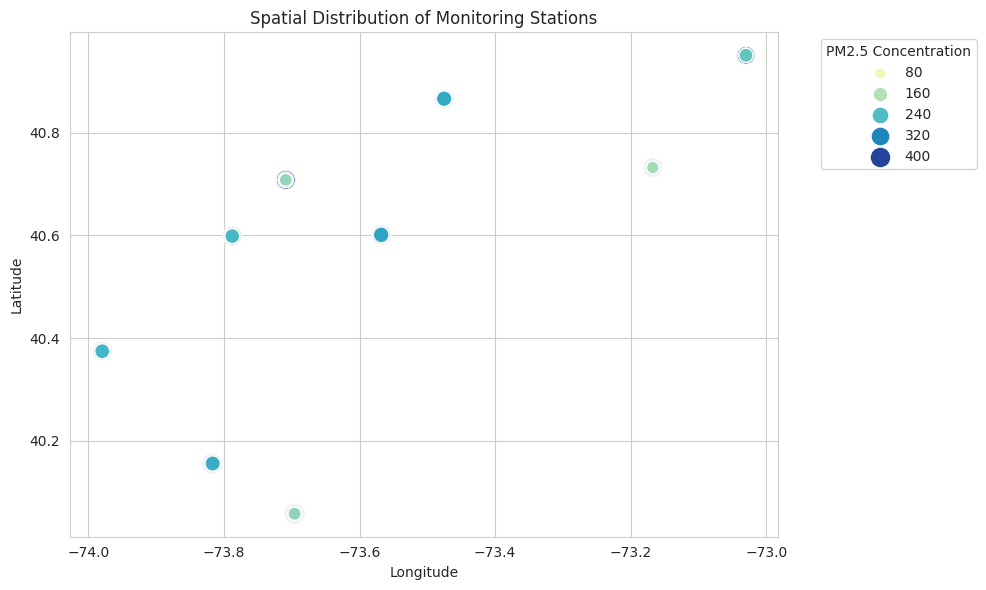

In [ ]:
# Spatial distribution of monitoring stations

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Longitude'], y=df['Latitude'], hue=df['PM2.5'], palette="YlGnBu", size=df['PM2.5'], sizes=(20, 200))
plt.title('Spatial Distribution of Monitoring Stations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='PM2.5 Concentration', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


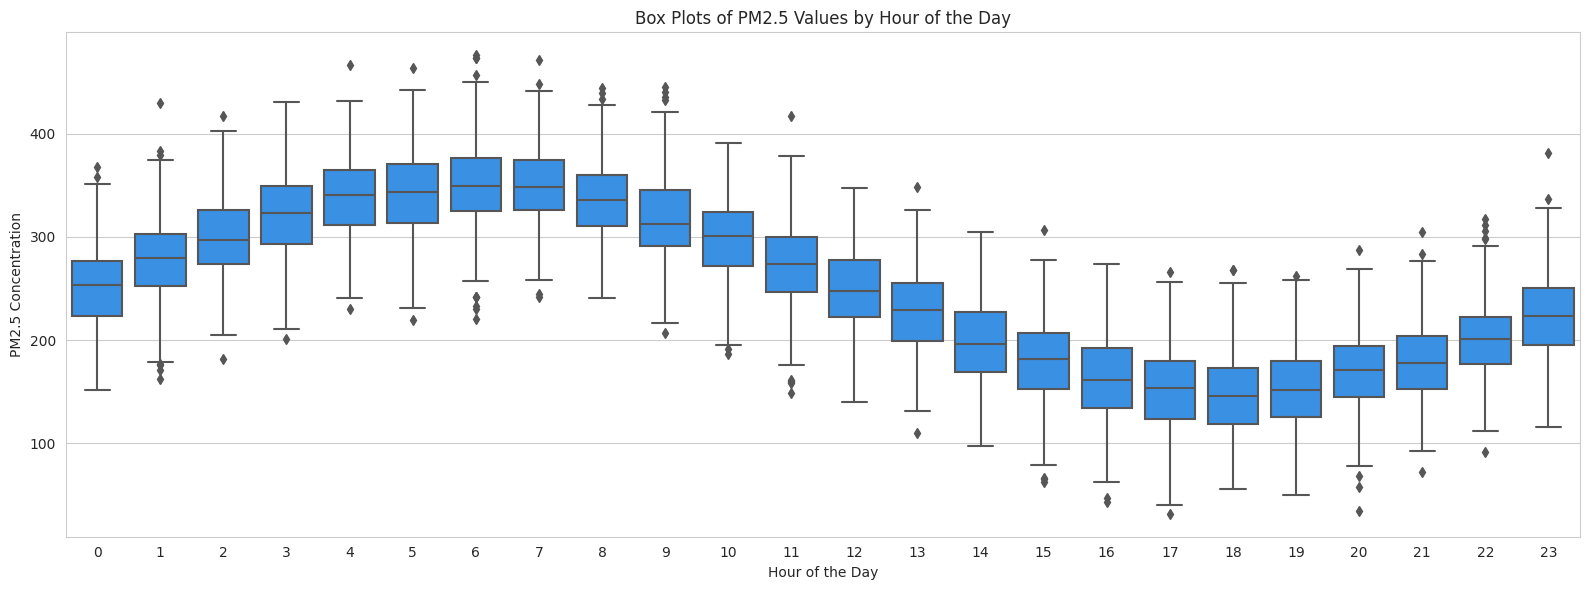

In [ ]:
# Box plots for PM2.5 values at different hours of the day

plt.figure(figsize=(16, 6))
sns.boxplot(x=df['Hour'], y=df['PM2.5'], color='dodgerblue')
plt.title('Box Plots of PM2.5 Values by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('PM2.5 Concentration')
plt.tight_layout()
plt.show()


## Data Cleaning

In [ ]:
# Recheck for missing values
missing_values_check = df.isnull().sum()

# Detect outliers using the IQR method for PM2.5 concentration
Q1 = df['PM2.5'].quantile(0.25)
Q3 = df['PM2.5'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers
outliers = df[(df['PM2.5'] < lower_bound) | (df['PM2.5'] > upper_bound)]

missing_values_check, outliers.shape[0]


(Latitude     0
 Longitude    0
 Timestamp    0
 PM2.5        0
 Hour         0
 Day          0
 dtype: int64,
 0)

## Data Preparation

In [ ]:
# Feature Engineering: Create indicators for different parts of the day

# Define a function to categorize hours
def categorize_hour(hour):
    if 0 <= hour < 6:
        return 'Night'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

# Apply the function to the 'Hour' column to create a new feature
df['Part_of_Day'] = df['Hour'].apply(categorize_hour)

# Display the first few rows with the new feature
df[['Hour', 'Part_of_Day']].head()


,Hour,Part_of_Day
0,0,Night
1,1,Night
2,2,Night
3,3,Night
4,4,Night


In [ ]:
# One-hot encoding of the 'Part_of_Day' feature
df_encoded = pd.get_dummies(df, columns=['Part_of_Day'], drop_first=True)

# Display the first few rows with the encoded features
df_encoded.head()


,Latitude,Longitude,Timestamp,PM2.5,Hour,Day,Part_of_Day_Evening,Part_of_Day_Morning,Part_of_Day_Night
0,40.37454,-73.979416,2023-10-01 00:00:00,209.486755,0,1,0,0,1
1,40.37454,-73.979416,2023-10-01 01:00:00,288.451798,1,1,0,0,1
2,40.37454,-73.979416,2023-10-01 02:00:00,263.679037,2,1,0,0,1
3,40.37454,-73.979416,2023-10-01 03:00:00,264.218530,3,1,0,0,1
4,40.37454,-73.979416,2023-10-01 04:00:00,395.228491,4,1,0,0,1


In [ ]:
from sklearn.preprocessing import StandardScaler

# List of features to standardize
features_to_standardize = ['Latitude', 'Longitude', 'PM2.5']

# Initialize the standard scaler
scaler = StandardScaler()

# Apply standardization
df_encoded[features_to_standardize] = scaler.fit_transform(df_encoded[features_to_standardize])

# Display the first few rows with standardized features
df_encoded.head()


,Latitude,Longitude,Timestamp,PM2.5,Hour,Day,Part_of_Day_Evening,Part_of_Day_Morning,Part_of_Day_Night
0,-0.485878,-1.306182,2023-10-01 00:00:00,-0.496956,0,1,0,0,1
1,-0.485878,-1.306182,2023-10-01 01:00:00,0.476483,1,1,0,0,1
2,-0.485878,-1.306182,2023-10-01 02:00:00,0.171098,2,1,0,0,1
3,-0.485878,-1.306182,2023-10-01 03:00:00,0.177748,3,1,0,0,1
4,-0.485878,-1.306182,2023-10-01 04:00:00,1.792769,4,1,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split

# Features and target variable
X = df_encoded.drop(columns=['Timestamp', 'PM2.5', 'Hour', 'Day'])
y = df_encoded['PM2.5']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape


((5952, 5), (1488, 5))

## Modelling

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Predict on the testing set
lr_predictions = lr_model.predict(X_test)

# Evaluate the model
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_rmse = mean_squared_error(y_test, lr_predictions, squared=False)

lr_mae, lr_rmse


(0.5135713816148824, 0.6358736036427386)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Predict on the testing set
dt_predictions = dt_model.predict(X_test)

# Evaluate the model
dt_mae = mean_absolute_error(y_test, dt_predictions)
dt_rmse = mean_squared_error(y_test, dt_predictions, squared=False)

dt_mae, dt_rmse


(0.5165865700336415, 0.6381291682635566)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the testing set
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)

rf_mae, rf_rmse


(0.5164989087946353, 0.63807937478584)